In [2]:
import numpy
import math
import random
import time
import matplotlib.pyplot as plt

In [3]:
environment = numpy.zeros((5, 5))
trans_prob = 1
environment[3, 4] = 10
#environment[2, 3] = -5

In [4]:
alpha = 0.5
gamma = 0.9

In [5]:
def get_legal_actions(pos):
    legal_actions = list()
    new_pos = list()
    all_actions = [[1, 0], [0, 1], [-1, 0], [0, -1]]
    for i in all_actions:
        try:
            new_pos = numpy.add(pos, numpy.array(i))
            legal_actions.append(i)
            env = environment[new_pos[0]][new_pos[1]]
            if any(j < 0 for j in new_pos):
                legal_actions.pop()
        except IndexError:
            legal_actions.pop()
            
        
    return legal_actions

In [6]:
def take_action(pos, action):
    # Take action in the actual environment and return a reward and new position based on environment dynamics
    if numpy.random.rand(1) < 0.2:
        new_pos = numpy.add(pos, action)
    else:
        new_pos = numpy.add(pos, random.choice(get_legal_actions(pos)))
    reward = environment[new_pos[0]][new_pos[1]]
    return new_pos, reward

In [7]:
mb_internal_environment = numpy.zeros((5, 5))


In [8]:
def mb_internal_environment_value(pos):
    value = mb_internal_environment[pos[0], pos[1]]
    return value

In [9]:
def update_mb_internal_environment(pos, next_pos, reward):
    next_value_list = list()
    for i in get_legal_actions(next_pos):
        next_value_list.append(mb_internal_environment[next_pos[0]][next_pos[1]])
    next_value = max(next_value_list)
    prediction_error = (reward + gamma*next_value) - mb_internal_environment_value(pos)
    if PD:
        if PD_OFF:
            if prediction_error >= 0.1:
                prediction_error = 0.1
        elif PD_ON:
            prediction_error = prediction_error + 0.5
        
    mb_internal_environment[pos[0], pos[1]] = mb_internal_environment_value(pos) - alpha * prediction_error
    

In [10]:
def dls(pos, curr_depth, max_depth):
    value_list = list()
    if curr_depth == max_depth:
        return mb_internal_environment_value(pos)
    else:
        actions = get_legal_actions(pos)
        for i in actions:
            next_pos = numpy.add(numpy.array(pos), numpy.array(i))
            value = mb_internal_environment_value(pos) + gamma * dls(next_pos, curr_depth+1, max_depth)
            value_list.append(value)
        if value_list:
            average_value = numpy.mean(numpy.array(value_list))
    return average_value

In [11]:
def dls_action(pos, max_depth):
    # Do depth Limited Search till max_depth on the mb_internal_environment
    actions = get_legal_actions(pos)
    next_value_list = list()
    next_pos_list = list()
    for i in actions:
        next_pos = numpy.add(numpy.array(pos), numpy.array(i))
        next_value_list.append(dls(next_pos, 0, max_depth))
        next_pos_list.append(next_pos)
    action = actions[numpy.argmax(next_value_list)]
    return action

In [12]:
def q_action(pos):
    # Look for q values in mf_internal_environment for given position
    actions = get_legal_actions(pos)
    next_value_list = list()
    next_pos_list = list()
    for i in actions:
        next_pos = numpy.add(numpy.array(pos), numpy.array(i))
        next_value_list.append(mb_internal_environment[next_pos[0], next_pos[1]])
        next_pos_list.append(next_pos)
    action = actions[numpy.argmax(next_value_list)]
    return action

In [13]:
def dual(num_iters, steps_per_iter):
    sum_reward = 0
    max_depth = 4
    for i in range(num_iters):
        pos = [0, 0]
        for j in range(steps_per_iter):
            if j%(i+1) == 0:
                action = dls_action(pos, max_depth)
                next_pos, reward = take_action(pos, action)
                update_mb_internal_environment(pos, next_pos, reward)
                pos = next_pos
            else:
                action = q_action(pos)
                next_pos, reward = take_action(pos, action)
                update_mb_internal_environment(pos, next_pos, reward)
                pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
    return sum_reward

In [14]:
def mb(num_iters, steps_per_iter):
    sum_reward = 0
    max_depth = 4
    for i in range(num_iters):
        pos = [0, 0]
        for j in range(steps_per_iter):
            action = dls_action(pos, max_depth)
            next_pos, reward = take_action(pos, action)
            update_mb_internal_environment(pos, next_pos, reward)
            pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
    return sum_reward

In [15]:
def mf(num_iters, steps_per_iter):
    sum_reward = 0
    max_depth = 4
    for i in range(num_iters):
        pos = [0, 0]
        for j in range(steps_per_iter):
            action = q_action(pos)
            next_pos, reward = take_action(pos, action)
            update_mb_internal_environment(pos, next_pos, reward)
            pos = next_pos
            sum_reward = 0.5*sum_reward + 0.5*reward
    return sum_reward

In [16]:
mb_internal_environment = numpy.zeros((5, 5))


Run the Dual Process on grid world. Get a list of individual time taken for each and rewards obtained.

In [18]:
times_dual = list()
reward_dual = list()
PD = 1
PD_OFF = 1
PD_ON = 0
for i in range(100):
    mb_internal_environment = numpy.zeros((5, 5))
    start_time = time.time()
    reward_dual.append(dual(24, 25))
    times_dual.append(time.time() - start_time)


In [260]:
times_mb = list()
reward_mb = list()
for i in range(100):
    mb_internal_environment = numpy.zeros((5, 5))
    start_time = time.time()
    reward_mb.append(mb(24, 25))
    times_mb.append(time.time() - start_time)


In [261]:
times_mf = list()
reward_mf = list()
for i in range(100):
    mb_internal_environment = numpy.zeros((5, 5))
    start_time = time.time()
    reward_mf.append(mf(24, 25))
    times_mf.append(time.time() - start_time)


In [263]:
reward_mean_dual = numpy.mean(numpy.array(reward_dual))
reward_mean_mb = numpy.mean(numpy.array(reward_mb))
reward_mean_mf = numpy.mean(numpy.array(reward_mf))
times_mean_dual = numpy.mean(numpy.array(times_dual))
times_mean_mb = numpy.mean(numpy.array(times_mb))
times_mean_mf = numpy.mean(numpy.array(times_mf))


In [264]:
reward_errors = ([max(reward_dual) - numpy.mean(numpy.array(reward_dual)), max(reward_mb) - numpy.mean(numpy.array(reward_mb)), max(reward_mf) - numpy.mean(numpy.array(reward_mf))]), 

In [265]:
times_errors = ([max(times_dual) - numpy.mean(numpy.array(times_dual)), max(times_mb) - numpy.mean(numpy.array(times_mb)), max(times_mf) - numpy.mean(numpy.array(times_mf))]), 

In [266]:
rewards = numpy.array([reward_mean_mb, reward_mean_dual, reward_mean_mf])
yerror = numpy.array(reward_errors)
print (rewards)

[ 2.06626935  1.01118283  0.83456483]


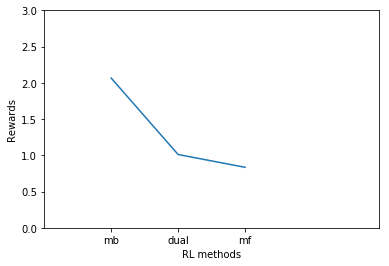

In [267]:
reward_plot, = plt.plot(numpy.arange(0, 3), rewards)
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 4)
plt.ylim(ymin = 0, ymax = 3)
plt.xlabel('RL methods')
plt.ylabel("Rewards")

plt.show()

[ 5.06465432  0.87985836  0.04973174]


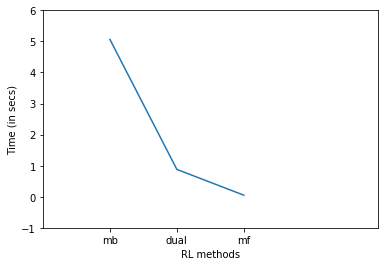

In [268]:
times = numpy.array([times_mean_mb, times_mean_dual, times_mean_mf])
print (times)
reward_plot, = plt.plot(numpy.arange(0, 3), times)
plt.xticks(numpy.arange(3), ('mb', 'dual', 'mf'))
plt.xlim(xmin = -1, xmax = 4)
plt.ylim(ymin = -1, ymax = 6)
plt.xlabel('RL methods')
plt.ylabel("Time (in secs)")

plt.show()